**Visualize U-Net model run**

In [0]:
from google.colab import drive

In [2]:
#@title
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('gdrive/My Drive/image-segmentation')

In [0]:
import json

with open('results/unet/all_scalars.json') as json_file:
    data = json.load(json_file)

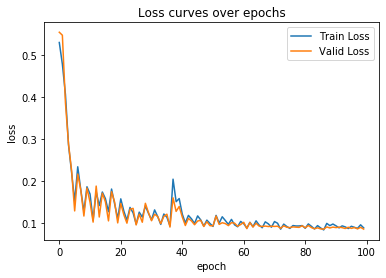

In [5]:
import matplotlib.pyplot as plt
plt.plot(data['loss_train'], label='Train Loss')
plt.plot(data['loss_valid'], label='Valid Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curves over epochs')
plt.legend()
plt.show()


In [0]:
import torch
## Load the best model
state_dicts = torch.load('/content/gdrive/My Drive/image-segmentation/results/unet/model_epoch-86_val_loss-0.0861.pth')

In [0]:
from unet.model import UNet

In [8]:
model = UNet()
model.load_state_dict(state_dicts['model_state_dict'])

<All keys matched successfully>

In [0]:
import numpy as np
## load training set with images and masks
train_images = np.load('data/train_img_256x256.npy')
train_masks = np.load('data/train_mask_256x256.npy')

In [0]:
np.random.seed(42)
# select 8 indices from training set
random_idx = np.random.randint(low=0, high=len(train_images), size=8)

In [0]:
show_images = train_images[random_idx]
show_masks = train_masks[random_idx]

In [12]:
print(np.max(show_images))

255


In [13]:
print(np.max(show_masks))

True


In [0]:
show_masks = show_masks.astype(float)

In [15]:
np.max(show_masks)

1.0

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
model = model.to(device)

In [0]:
show_images_torch = torch.from_numpy(show_images/255.0)
show_images_torch = show_images_torch.type(torch.FloatTensor)


In [19]:
print(show_images_torch.size())

torch.Size([8, 256, 256, 3])


In [0]:
show_images_torch = show_images_torch.permute(dims=(0, 3, 1, 2))

In [21]:
print(show_images_torch.size())

torch.Size([8, 3, 256, 256])


In [0]:
show_images_torch = show_images_torch.to(device)
predicted_masks = torch.sigmoid(model(show_images_torch)).cpu()

In [0]:
show_masks_torch = torch.from_numpy(show_masks).permute(dims=(0, 3, 1, 2))

In [0]:
def show(img, title):
    if img.requires_grad:
      img = img.detach()
    npimg = img.numpy()
    img = np.transpose(npimg, (1,2,0))
    if img.shape[2] == 1:
      img = np.squeeze(img)
    plt.imshow(img, interpolation='nearest')
    plt.title(title)
    plt.show()

In [25]:
print(predicted_masks.size())
print(show_masks_torch.size())

torch.Size([8, 1, 256, 256])
torch.Size([8, 1, 256, 256])


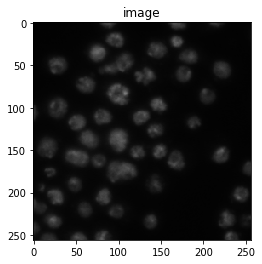

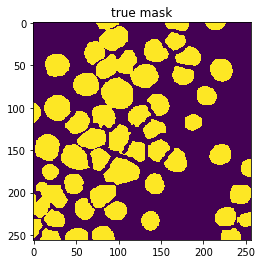

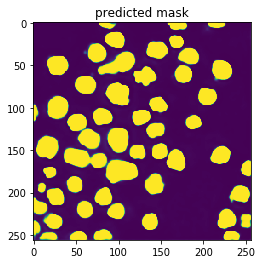

------


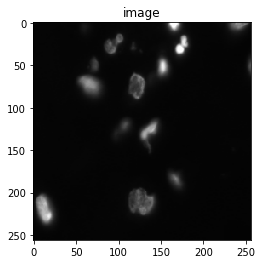

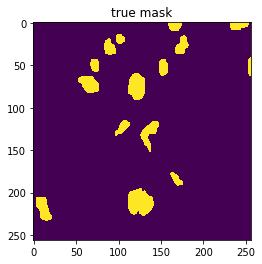

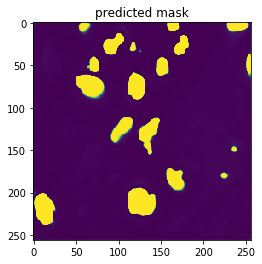

------


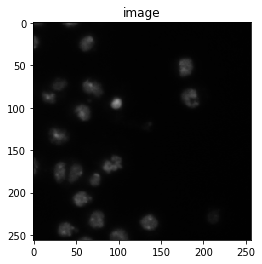

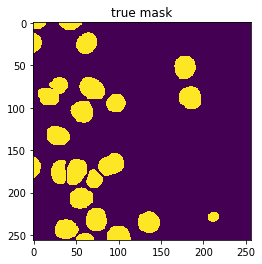

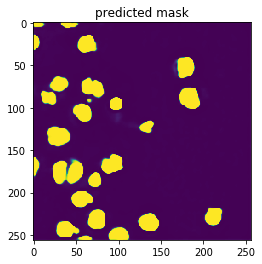

------


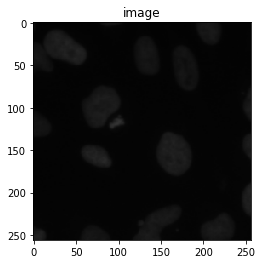

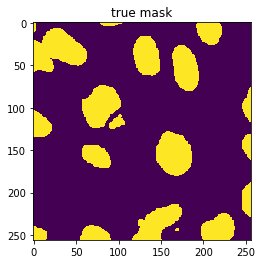

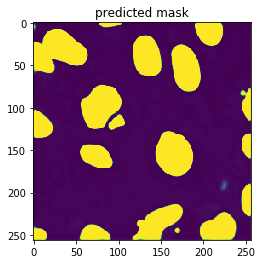

------


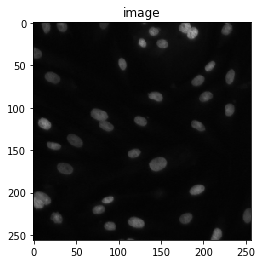

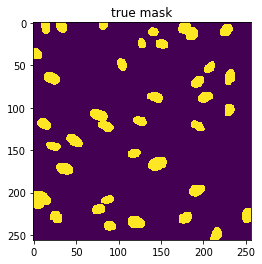

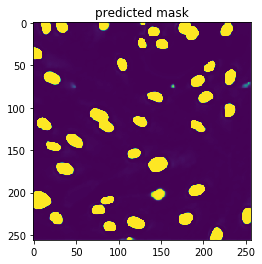

------


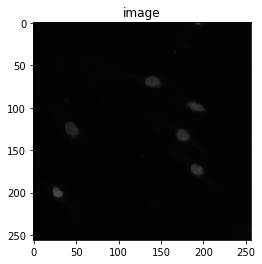

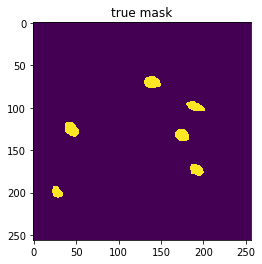

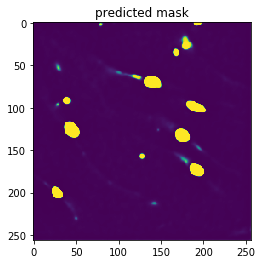

------


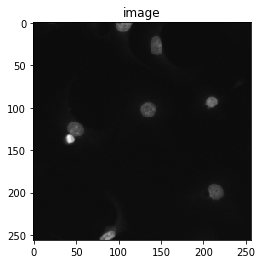

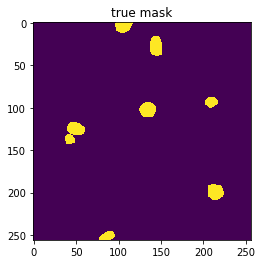

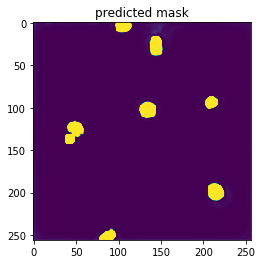

------


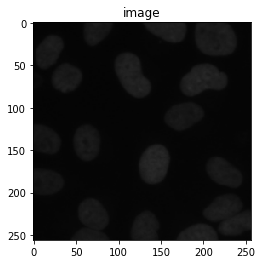

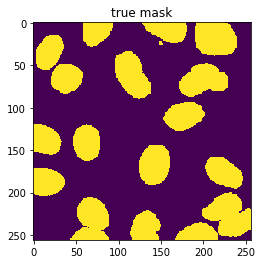

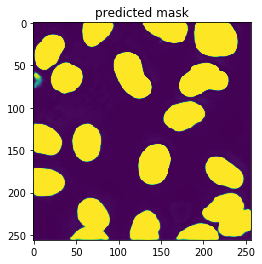

------


In [28]:
for image, true_mask, predicted_mask in zip(show_images_torch.cpu(), show_masks_torch.cpu(), predicted_masks.detach().cpu()):
  show(image, "image")
  show(true_mask, "true mask")
  show(predicted_mask, "predicted mask")
  print("------")


In [30]:
print('End')

End
